In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
market_sentiment = pd.read_csv("/content/fear_greed_index.csv")
market_sentiment


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [ ]:
historical = pd.read_csv("/content/historical_data.csv")
historical

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [ ]:
market_sentiment.shape

(2644, 4)

In [ ]:
historical.shape

(211224, 16)

In [ ]:
market_sentiment.info()
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side       

In [ ]:
market_sentiment.isnull().sum()


,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
historical.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [ ]:
market_sentiment.duplicated().sum()

np.int64(0)

In [ ]:
historical.duplicated().sum()

np.int64(0)

In [ ]:
market_sentiment['date'] = pd.to_datetime(market_sentiment['date'])


In [ ]:
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [ ]:
historical['date'] = historical['Timestamp IST'].dt.normalize()
df = historical.merge(market_sentiment[['date','classification']],
                      on='date',
                      how='left'
                      )

# Dailypnl per trade

In [ ]:
daily_pnl = (df.groupby(['date','Account','classification']).agg(
    daily_pnl = ('Closed PnL','sum'),
    trade_count = ('Closed PnL','count'),
    avg_size = ('Size USD', 'mean')
)
.reset_index())

# win rate

In [ ]:
df['win'] = df['Closed PnL']> 0

win_rate = (df.groupby(['Account','classification'])['win']
            .mean()
            .reset_index(name='win_rate'))

# Long short ratio

In [ ]:
is_ratio = (df.groupby(['classification','Side'])
            .size()
            .unstack()
            )
is_ratio['long_short_ratio'] =  is_ratio['BUY']/is_ratio['SELL']

# Part B — Analysis

In [ ]:
daily_pnl.groupby('classification')['daily_pnl'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,160.0,4619.439053,29534.839183,-77308.420095,0.0,218.377399,3381.323773,229058.684298
Extreme Greed,526.0,5161.922644,27496.863832,-132271.000000,0.0,418.319862,2385.426442,449328.107544
Fear,630.0,5328.818161,31659.771538,-108604.496278,0.0,107.892532,1807.148049,533974.662903
Greed,648.0,3318.100730,30599.040173,-358963.139984,0.0,158.214922,1319.220865,375620.270243
Neutral,376.0,3438.618818,17447.863645,-113601.020138,0.0,167.551743,1321.966347,194499.072534


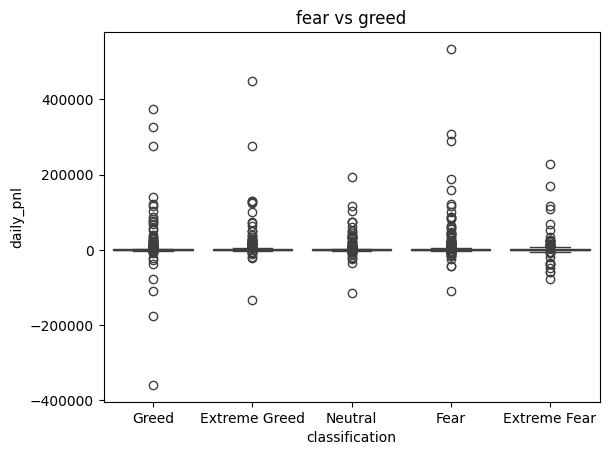

In [ ]:
sns.boxplot(data=daily_pnl,x='classification',y='daily_pnl')
plt.title("fear vs greed")
plt.show()

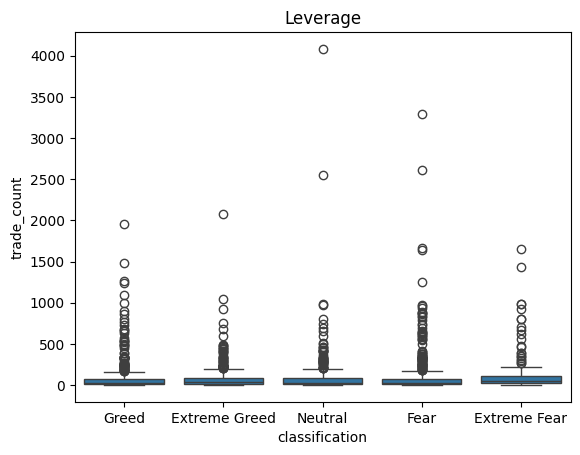

In [ ]:
daily_pnl.groupby('classification')['trade_count'].mean()

sns.boxplot(data=daily_pnl, x= 'classification', y = 'trade_count')
plt.title('Leverage')
plt.show()

# Segment 1: High vs Low leverage

In [ ]:
df = df.merge(daily_pnl[['date', 'Account', 'classification', 'trade_count']],
             on=['date', 'Account', 'classification'],
             how='left')
df['leverage_groups'] = np.where(df['trade_count'] >= 5,'high leverage','low leverage')

In [ ]:
df.groupby(['leverage_groups','classification'])['Closed PnL'].mean()

leverage_groups  classification
high leverage    Extreme Fear       35.414282
                 Extreme Greed      66.328965
                 Fear               54.386735
                 Greed              42.167637
                 Neutral            34.129399
low leverage     Extreme Fear     -569.598045
                 Extreme Greed     390.387807
                 Fear               19.752408
                 Greed             151.490736
                 Neutral           102.702146
Name: Closed PnL, dtype: float64

# Segment 2: Frequent vs Infrequent traders

In [ ]:
trade_count = df.groupby('Account').size()
df['frequent_groups'] = df['Account'].map(lambda x : "Frequent" if trade_count[x] > trade_count.median() else 'infrequent')

# Segment 3: Consistent winners

In [ ]:
account_pnl = df.groupby('Account')['Closed PnL'].sum()
df['winner_groups'] = df['Account'].map( lambda x : 'Consisten winning ' if account_pnl[x] >0 else 'not consisten winning')

In [ ]:
daily_pnl ['profit_bucket'] = np.where( daily_pnl['daily_pnl'] > 0,1,0)

In [ ]:
x = daily_pnl[['trade_count', 'avg_size']]
y = daily_pnl['profit_bucket']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_prid = model.predict(x_test)
y_prid

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [55]:
from sklearn.metrics import accuracy_score

In [57]:
Accuracy = accuracy_score(y_test,y_prid)
Accuracy

0.6517094017094017